# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

Test on Markdown

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Change this part with your own dataset files
previous_application = 'drive/MyDrive/Advanced_Machine_Learning/previous_application.csv'
src_bureau = 'drive/MyDrive/Advanced_Machine_Learning/bureau.csv'
src_bureau_balance = 'drive/MyDrive/Advanced_Machine_Learning/bureau_balance.csv'
src_train = 'drive/MyDrive/Advanced_Machine_Learning/application_train.csv'
src_test = 'drive/MyDrive/Advanced_Machine_Learning/application_test.csv'


# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally



<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [4]:
#Your code here
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past


# 1 - Loading the different datasets.
prev_app = pd.read_csv(previous_application)
bureau = pd.read_csv(src_bureau)
bureau_balance = pd.read_csv(src_bureau_balance)
app_train = pd.read_csv(src_train)
app_test = pd.read_csv(src_test)

# 2 - The number of rows and columns for each
print(f'Number of rows and columns for previous application: {prev_app.shape}')
print(f'Number of rows and columns for bureau: {bureau.shape}')
print(f'Number of rows and columns for previous balance: {bureau_balance.shape}')
print(f'Number of rows and columns for train: {app_train.shape}')
print(f'Number of rows and columns for test: {app_test.shape}')


Number of rows and columns for previous application: (1670214, 37)
Number of rows and columns for bureau: (1716428, 17)
Number of rows and columns for previous balance: (27299925, 3)
Number of rows and columns for train: (307511, 122)
Number of rows and columns for test: (48744, 121)


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [5]:
# 3a missing values on app_test
missing_values = app_test.isnull().sum()
print(f'Columns with the most missing values: \n{missing_values.sort_values(ascending=False).head(5)}')

# 3b missing values on bureau
missing_values = bureau.isnull().sum()
print(f'Columns with the most missing values: \n{missing_values.sort_values(ascending=False).head(5)}')

## 3c
missing_values =  prev_app.isnull().sum()
print(f'Columns with the most missing values: \n{missing_values.sort_values(ascending=False).head(5)}')


Columns with the most missing values: 
COMMONAREA_AVG              33495
COMMONAREA_MODE             33495
COMMONAREA_MEDI             33495
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
dtype: int64
Columns with the most missing values: 
AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
dtype: int64
Columns with the most missing values: 
RATE_INTEREST_PRIVILEGED    1664263
RATE_INTEREST_PRIMARY       1664263
AMT_DOWN_PAYMENT             895844
RATE_DOWN_PAYMENT            895844
NAME_TYPE_SUITE              820405
dtype: int64


In [6]:
# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

## Your code here

## Get the column names to iterate through them
columns_names = app_test.columns.tolist()

## Check for skewness to decide which is the 'best' way to fix missing vlaues
# for column in columns_names:
#   if app_test[column].dtype == 'float64' or app_test[column].dtype == 'numerical' or app_test[column].dtype == 'int':
#     print(app_test[column].skew())

## Fill NaN numerical columns whith MEDIAN value
for column in columns_names:
  if app_test[column].dtype == 'float64' or app_test[column].dtype == 'numerical' or app_test[column].dtype == 'int':
    app_test[column] = app_test[column].fillna(app_test[column].median())


## Fill NaN categorical columns with "Not specified" value
categorical_missing = app_test.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
categorical_missing = categorical_missing[categorical_missing > 0]
categorical_missing = categorical_missing.index.tolist()

for column in categorical_missing:
  app_test[column] = app_test[column].fillna('not specified')


## Check if there is a column with missing values after fixing them
app_test.isnull().sum().sort_values(ascending=True)




,0
SK_ID_CURR,0
TOTALAREA_MODE,0
HOUSETYPE_MODE,0
FONDKAPREMONT_MODE,0
NONLIVINGAREA_MEDI,0
...,...
REG_REGION_NOT_LIVE_REGION,0
HOUR_APPR_PROCESS_START,0
WEEKDAY_APPR_PROCESS_START,0
YEARS_BEGINEXPLUATATION_MODE,0


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)

---

Here I decided to fill the null values with the mean in the case of the numerical values and for categorical values I decided to add the 'not specified' value, since there was already a value named like this.
And in the case of the numerical values, the skewness was verified, and since most of the data was skewed the MEDIAN was a better way to fill the missing values.

## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


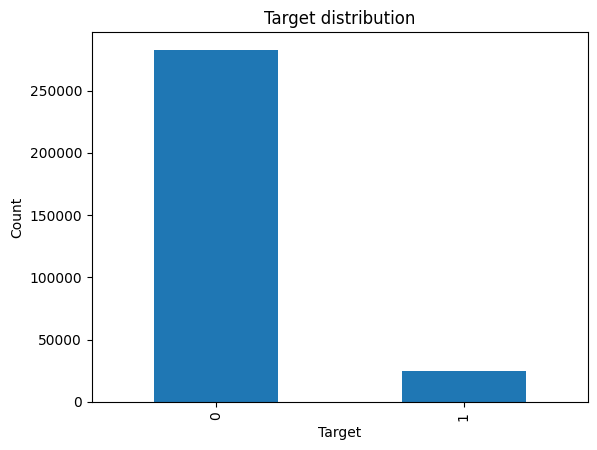

In [7]:
## Checking class imbalance on 'TARGET' column
# 5 - value counts
print(app_train['TARGET'].value_counts())
print(app_train['TARGET'].value_counts(normalize = True) *100)

# 5 - histograms
app_train['TARGET'].value_counts().plot(kind='bar')
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

TARGET
0    24825
1    24825
Name: count, dtype: int64


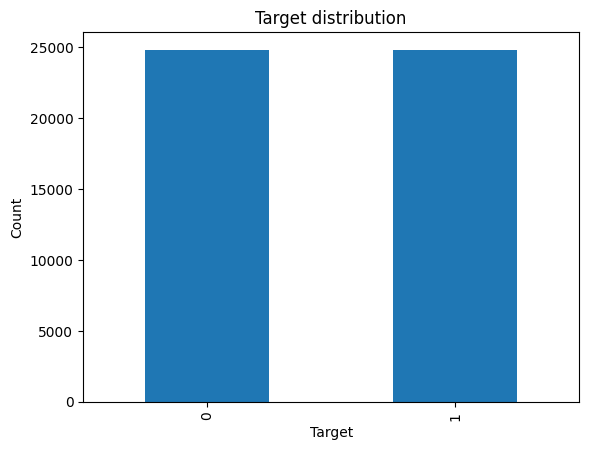

In [8]:
# 6.a Fix the class imbalance with over/undersampling
app_train_copy = app_train.copy()

majority_class = app_train_copy[app_train_copy['TARGET'] == app_train_copy['TARGET'].value_counts().idxmax()]
minority_class = app_train_copy[app_train_copy['TARGET'] == app_train_copy['TARGET'].value_counts().idxmin()]

majority_undersampled = majority_class.sample(n = len(minority_class), random_state = 42)
undersampled = pd.concat([majority_undersampled, minority_class])

print(undersampled['TARGET'].value_counts())

undersampled['TARGET'].value_counts().plot(kind='bar')
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [9]:
# # 6.b Use the SMOTE algorithm to fix class imbalance
## import SMOTE library
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
## Create another copy of app_train dataframe
app_train_copy2 = app_train.copy()


SMOTE algorithm can not wor with missing values, then we have to change them

In [10]:
## Get the column names to iterate through them
columns_names = app_train_copy2.columns.tolist()
## Fill NaN numerical columns whith MEDIAN value
for column in columns_names:
  if app_train_copy2[column].dtype == 'float64' or app_train_copy2[column].dtype == 'numerical' or app_train_copy2[column].dtype == 'int':
    app_train_copy2[column] = app_train_copy2[column].fillna(app_train_copy2[column].median())


## Fill NaN categorical columns with "Not specified" value
categorical_missing = app_train_copy2.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
categorical_missing = categorical_missing[categorical_missing > 0]
categorical_missing = categorical_missing.index.tolist()

for column in categorical_missing:
  app_train_copy2[column] = app_train_copy2[column].fillna('not specified')


## Check if there is a column with missing values after fixing them
app_train_copy2.isnull().sum().sort_values(ascending=True)

,0
SK_ID_CURR,0
TOTALAREA_MODE,0
HOUSETYPE_MODE,0
FONDKAPREMONT_MODE,0
NONLIVINGAREA_MEDI,0
...,...
REG_REGION_NOT_LIVE_REGION,0
HOUR_APPR_PROCESS_START,0
WEEKDAY_APPR_PROCESS_START,0
REGION_RATING_CLIENT,0


In [13]:
# Separate features (X) and target (y)
X = app_train_copy2.drop(columns=['TARGET'])  # Assuming 'TARGET' is your class column
y = app_train_copy2['TARGET']

y.value_counts()



,count
TARGET,
0,282686
1,24825


After SMOTE, class distribution:
TARGET
1    282686
0    282686
Name: count, dtype: int64


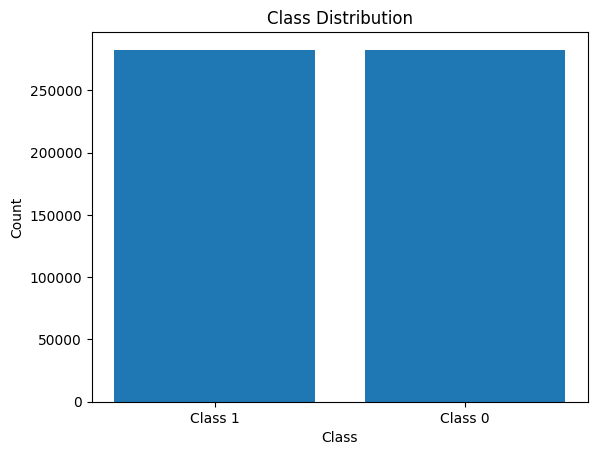

In [18]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns



# Preprocessing: OneHotEncoding for categorical and scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

smote = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state = 100)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Now X_resampled and y_resampled hold the balanced data
print("After SMOTE, class distribution:")
print(pd.Series(y_resampled).value_counts())

count_class = y_resampled.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

**5**: Describe briefly your observation (double click to edit a text cell)

Its better to create copies of the datframe since we can make mistakes, knowing this for the first approach we selected the majorty and minority class, and then decide to undersample the data, this part did not require any data handling since we were working with just the TARGET column.

For the use of SMOTE we have to make data handling since the algorithm does not support missing values, therefore we apply the same solution coded in missing values for app_test, this gave us the solution we needed for missing values, furthermore the algorithm does not support categorical values, this is the main reason to use one-hot encoding, changing this categorical values to numerical ones. then the algorithm could be applied, and as shown in the plot, the algorithm was applied correctly.

<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [51]:
##7a Transforming NAME_HOUSING_TYPE and CODE_GENDER
from sklearn.preprocessing import LabelEncoder
app_test_copy = app_test.copy()
## For the NAME_HOUSING_TYPE column we can use one hot encoding to do this task
app_test_copy['NAME_HOUSING_TYPE'].unique()
# Perform one-hot encoding using Pandas
one_hot_encoded = pd.get_dummies(app_test_copy, columns=['NAME_HOUSING_TYPE'],dtype=int)

# For CODE_GENDER column since there is just two values we can change Male=0 and Female=1 or viceversa with label encoder
label_encoder =  LabelEncoder()
app_test_copy['CODE_GENDER'] = label_encoder.fit_transform(app_test_copy['CODE_GENDER'])

In [53]:
##7b NAME_HOUSING_TYPE for only 3 categories
# app_test_copy = app_test.copy()

# app_test_copy['NAME_HOUSING_TYPE'].value_counts()

## Encoding FLAG_OWN_CAR
app_test_copy['FLAG_OWN_CAR'] = label_encoder.fit_transform(app_test_copy['FLAG_OWN_CAR'])
app_test_copy['FLAG_OWN_CAR'].unique()

array([0, 1])

In [71]:
## 7c
threshold = 0.1
count_threshold = len(app_test_copy) * threshold
print(count_threshold)

## Checking which of the features meet the threshold
category_counts = app_test_copy['ORGANIZATION_TYPE'].value_counts()
valid_categories = category_counts[category_counts > count_threshold].index

app_test_copy['ORGANIZATION_TYPE'] = app_test_copy['ORGANIZATION_TYPE'].apply(lambda x: x if x in valid_categories else 'Other')

dummy_vector = pd.get_dummies(app_test_copy['ORGANIZATION_TYPE'], prefix = 'ORG', dtype=int)
print(f'Dummy shape: {dummy_vector.shape}')



4874.400000000001
Dummy shape: (48744, 4)


In [77]:
## 8 app_test, app_past, bureau
app_test_copy = app_test.copy()
app_past_copy = prev_app.copy()
bureau_copy = bureau.copy()

categorical_cols_appTest = app_test_copy.select_dtypes(include=['object']).columns
categorical_cols_appPast = app_past_copy.select_dtypes(include=['object']).columns
categorical_cols_bureau = bureau_copy.select_dtypes(include=['object']).columns

one_hot_encoded_appTest = pd.get_dummies(app_test_copy, columns=categorical_cols_appTest, dtype=int)
one_hot_encoded_appPast = pd.get_dummies(app_past_copy, columns=categorical_cols_appPast, dtype=int)
one_hot_encoded_bureau = pd.get_dummies(bureau_copy, columns=categorical_cols_bureau, dtype=int)

In [78]:
one_hot_encoded_appTest.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_not specified,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_not specified
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,1,0,0,1,0,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,1,0,0,1
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,1,0,0,1
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,1,0,0,0,1,0,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,1,0,0,1


<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [ ]:
## Your code here

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [ ]:
## Your code here

##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

